In [1]:
import pandas as pd
import matplotlib.pyplot as plt
price = pd.read_csv('./마늘_난지_월별_가격.csv')

path = '마늘_공급량/garlic'
o00 = pd.read_excel('./{}_00.xlsx'.format(path))
o01 = pd.read_excel('./{}_01.xlsx'.format(path))
o02 = pd.read_excel('./{}_02.xlsx'.format(path))
o03 = pd.read_excel('./{}_03.xlsx'.format(path))
o04 = pd.read_excel('./{}_04.xlsx'.format(path))
o05 = pd.read_excel('./{}_05.xlsx'.format(path))
o06 = pd.read_excel('./{}_06.xlsx'.format(path))
o07 = pd.read_excel('./{}_07.xlsx'.format(path))
o08 = pd.read_excel('./{}_08.xlsx'.format(path))
o09 = pd.read_excel('./{}_09.xlsx'.format(path))
o10 = pd.read_excel('./{}_10.xlsx'.format(path))
o11 = pd.read_excel('./{}_11.xlsx'.format(path))
o12 = pd.read_excel('./{}_12.xlsx'.format(path))
o13 = pd.read_excel('./{}_13.xlsx'.format(path))
o14 = pd.read_excel('./{}_14.xlsx'.format(path))
o15 = pd.read_excel('./{}_15.xlsx'.format(path))
o16 = pd.read_excel('./{}_16.xlsx'.format(path))
o17 = pd.read_excel('./{}_17.xlsx'.format(path))
o18 = pd.read_excel('./{}_18.xlsx'.format(path))
o19 = pd.read_excel('./{}_19.xlsx'.format(path))
# o20 = pd.read_excel('./onion_20.xlsx')

product = pd.concat([o00, o01, o02, o03, o04, o05, o06, o07, o08, o09, o10, o11, o12, o13, o14, o15, o16, o17, o18, o19])
# onion = onion[2:]
product.head(10)

,거래년월일,품목명,시장코드,시장명,출하지코드,출하지명,거래량,품목코드
0,총 합계,전체,NaN,NaN,NaN,NaN,"7,649,457",NaN
1,소계,햇마늘 난지,NaN,NaN,NaN,NaN,"7,649,457",120904.0
2,20001229,햇마늘 난지,210001.0,부산엄궁도매시장,770010,경상북도영천시창구동,"95,720",120904.0
3,20001225,햇마늘 난지,320301.0,강릉도매시장,210010,강원도강릉시홍제동,"4,000",120904.0
4,20001221,햇마늘 난지,210001.0,부산엄궁도매시장,770010,경상북도영천시창구동,"82,000",120904.0
5,20001220,햇마늘 난지,240001.0,광주각화도매시장,520850,전라남도나주시봉황면,104,120904.0
6,20001220,햇마늘 난지,240001.0,광주각화도매시장,517850,전라남도담양군봉산면,30,120904.0
7,20001219,햇마늘 난지,210001.0,부산엄궁도매시장,800000,수입산,"24,271",120904.0
8,20001219,햇마늘 난지,240001.0,광주각화도매시장,517850,전라남도담양군봉산면,10,120904.0
9,20001219,햇마늘 난지,240001.0,광주각화도매시장,500000,광주북구,300,120904.0


In [2]:
product['year'] = product['거래년월일'].apply(lambda x: str(x)[:4]).astype(str)
product['month'] = product['거래년월일'].apply(lambda x: str(x)[4:6]).astype(str)
product['거래량'] = product['거래량'].apply(lambda x: ''.join(str(x).split(','))).astype(int) 
df = product[['year', 'month','거래량']]
total = df.groupby(['year','month'], as_index=False).sum()
total.head(10)

,year,month,거래량
0,2000,01,23320
1,2000,02,11775
2,2000,03,17487
3,2000,04,50833
4,2000,05,3573652
5,2000,06,3365216
6,2000,07,224556
7,2000,08,109910
8,2000,09,16031
9,2000,10,17439


In [3]:
total = total[:-2]
cat = pd.concat([price, total], axis=1)
cat.tail(10)

,년도,월,가격,year,month,거래량
230,2019,3,5060,2019,03,896
231,2019,4,5100,2019,04,10242
232,2019,5,5100,2019,05,1133310
233,2019,6,4833,2019,06,1183793
234,2019,7,3898,2019,07,225234
235,2019,8,3451,2019,08,76694
236,2019,9,3320,2019,09,32157
237,2019,10,3320,2019,10,12839
238,2019,11,3341,2019,11,21851
239,2019,12,3320,2019,12,19438


In [4]:
result = cat[['year','month','거래량','가격']]
result.head(10)

,year,month,거래량,가격
0,2000,01,23320,1410
1,2000,02,11775,1496
2,2000,03,17487,1709
3,2000,04,50833,1754
4,2000,05,3573652,1885
5,2000,06,3365216,1428
6,2000,07,224556,1379
7,2000,08,109910,1500
8,2000,09,16031,1770
9,2000,10,17439,1790


In [5]:
result.groupby('year').corr()

거래량        가격
year                        
2000 거래량  1.000000  0.055128
     가격   0.055128  1.000000
2001 거래량  1.000000 -0.871584
     가격  -0.871584  1.000000
2002 거래량  1.000000  0.227277
     가격   0.227277  1.000000
2003 거래량  1.000000 -0.129744
     가격  -0.129744  1.000000
2004 거래량  1.000000  0.157407
     가격   0.157407  1.000000
2005 거래량  1.000000  0.125966
     가격   0.125966  1.000000
2006 거래량  1.000000 -0.708191
     가격  -0.708191  1.000000
2007 거래량  1.000000  0.381387
     가격   0.381387  1.000000
2008 거래량  1.000000 -0.415932
     가격  -0.415932  1.000000
2009 거래량  1.000000 -0.387148
     가격  -0.387148  1.000000
2010 거래량  1.000000 -0.229662
     가격  -0.229662  1.000000
2011 거래량  1.000000 -0.071673
     가격  -0.071673  1.000000
2012 거래량  1.000000 -0.051405
     가격  -0.051405  1.000000
2013 거래량  1.000000 -0.056765
     가격  -0.056765  1.000000
2014 거래량  1.000000 -0.337286
     가격  -0.337286  1.000000
2015 거래량  1.000000 -0.309783
     가격  -0.309783  1.000000
2016 거래량  1.000000  0.603789
     가격   0.603789  1.000000
2017 거래량  1.000000  0.170709
     가격   0.170709  1.000000
2018 거래량  1.000000  0.363257
     가격   0.363257  1.000000
2019 거래량  1.000000  0.333085
     가격   0.333085  1.000000

In [6]:
cor_result = {'2000':0.055, '2001':-0.871, '2002':0.227, '2003':-0.129, '2004':0.157, '2005':0.125, '2006':-0.708,
              '2007':0.381, '2008':-0.415, '2009':-0.387, '2010':-0.229,'2011':-0.071,'2012':-0.051,'2013':-0.056,
              '2014':-0.337,'2015':-0.309,'2016':0.603,'2017':0.170,'2018':0.363,'2019':0.333}
cor_result

{'2000': 0.055,
 '2001': -0.871,
 '2002': 0.227,
 '2003': -0.129,
 '2004': 0.157,
 '2005': 0.125,
 '2006': -0.708,
 '2007': 0.381,
 '2008': -0.415,
 '2009': -0.387,
 '2010': -0.229,
 '2011': -0.071,
 '2012': -0.051,
 '2013': -0.056,
 '2014': -0.337,
 '2015': -0.309,
 '2016': 0.603,
 '2017': 0.17,
 '2018': 0.363,
 '2019': 0.333}

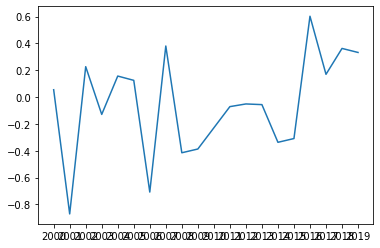

In [7]:
dates = list(cor_result.keys())          
prices = list(cor_result.values())       
plt.plot_date(dates, prices, '-') 

In [8]:
sorted_cor = {k: v for k, v in sorted(cor_result.items(), key=lambda item: item[1])}
sorted_cor

{'2001': -0.871,
 '2006': -0.708,
 '2008': -0.415,
 '2009': -0.387,
 '2014': -0.337,
 '2015': -0.309,
 '2010': -0.229,
 '2003': -0.129,
 '2011': -0.071,
 '2013': -0.056,
 '2012': -0.051,
 '2000': 0.055,
 '2005': 0.125,
 '2004': 0.157,
 '2017': 0.17,
 '2002': 0.227,
 '2019': 0.333,
 '2018': 0.363,
 '2007': 0.381,
 '2016': 0.603}

{'s_m': 2, 'm_m': 1, 'w_m': 8, 'w_p': 8, 'm_p': 1, 's_p': 0}


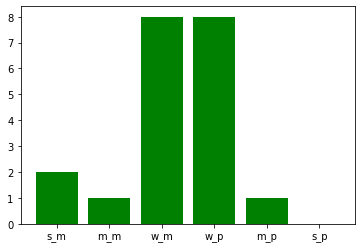

In [9]:
cor_dict = {'s_m':0, 'm_m':0, 'w_m':0, 'w_p':0, 'm_p':0, 's_p':0}
for key, value in sorted_cor.items():
    if value < -0.7:
        cor_dict['s_m'] += 1
    elif -0.7 <= value and value < -0.4:
        cor_dict['m_m'] += 1
    elif -0.4 <= value and value < 0:
        cor_dict['w_m'] += 1
    elif 0 <= value and value < 0.4:
        cor_dict['w_p'] += 1
    elif 0.4 <= value and value < 0.7:
        cor_dict['m_p'] += 1
    else:
        cor_dict['s_p'] += 1
plt.bar(cor_dict.keys(), cor_dict.values(), color='g')
print(cor_dict)